# Reuter, multi-class classification

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(train_data.shape)

2110848/2110848 [==============================] - 1s 0us/step
(8982,)


In [3]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
#restore the sentence
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

print(decoded_newswire)

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [5]:
print(train_labels[0])

3


In [7]:
# Data preprocessing

#one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences),dimension))

    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    
    return result

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [8]:
#can apply to labels too
y_train = vectorize_sequences(train_labels, dimension=46)
y_test = vectorize_sequences(test_labels, dimension=46)

print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
#convert to categorical data
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [10]:
# Build Model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Split train and validation data

X_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [14]:
# train model

history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data = (X_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 2.4755 - accuracy: 0.5068 - val_loss: 1.6045 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3342 - accuracy: 0.7058 - val_loss: 1.2461 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0034 - accuracy: 0.7834 - val_loss: 1.1003 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8002 - accuracy: 0.8297 - val_loss: 1.0065 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6370 - accuracy: 0.8668 - val_loss: 0.9484 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5098 - accuracy: 0.8971 - val_loss: 0.9137 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4059 - accuracy: 0.9161 - val_loss: 0.8846 - val_accuracy: 0.8080
Epoch 8/20
16

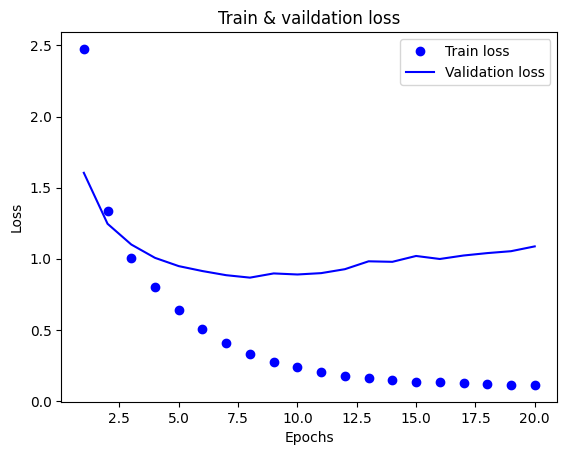

In [15]:
# Visualization

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Train & vaildation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

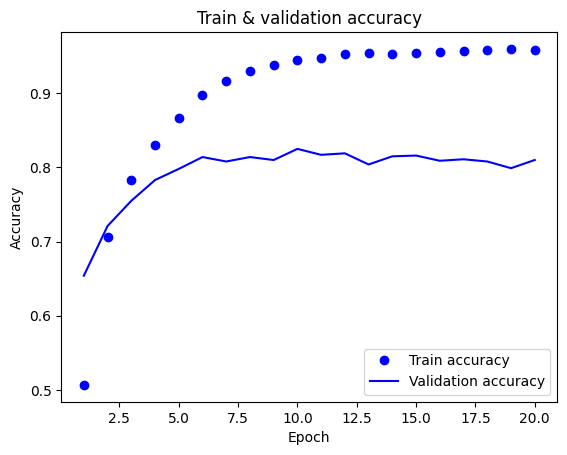

In [17]:
plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Train & validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
score = model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.2300 - accuracy: 0.7903
